Time series-indian onion market 

In [1]:
#import required basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/MonthWiseMarketArrivals_Clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
df.shape

(10227, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [7]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [8]:
pd.unique(df.market), pd.unique(df.city), pd.unique(df.state)

(array(['ABOHAR(PB)', 'AGRA(UP)', 'AHMEDABAD(GUJ)', 'AHMEDNAGAR(MS)',
        'AJMER(RAJ)', 'ALIGARH(UP)', 'ALWAR(RAJ)', 'AMRITSAR(PB)',
        'BALLIA(UP)', 'BANGALORE', 'BAREILLY(UP)', 'BELGAUM(KNT)',
        'BHATINDA(PB)', 'BHAVNAGAR(GUJ)', 'BHOPAL', 'BHUBNESWER(OR)',
        'BIHARSHARIF(BHR)', 'BIJAPUR(KNT)', 'BIKANER(RAJ)', 'BOMBORI(MS)',
        'BURDWAN(WB)', 'CHAKAN(MS)', 'CHALLAKERE(KNT)', 'CHANDIGARH',
        'CHANDVAD(MS)', 'CHENNAI', 'CHICKBALLAPUR(KNT)',
        'COIMBATORE(TN) (bellary)', 'COIMBATORE(TN) (podisu)',
        'DEESA(GUJ)', 'DEHRADOON(UTT)', 'DELHI', 'DEORIA(UP)',
        'DEVALA(MS)', 'DEWAS(MP)', 'DHAVANGERE(KNT)', 'DHULIA(MS)',
        'DINDIGUL(TN)', 'DINDIGUL(TN)(Podis', 'DINDORI(MS)', 'ETAWAH(UP)',
        'GONDAL(GUJ)', 'GORAKHPUR(UP)', 'GUWAHATI', 'HALDWANI(UTT)',
        'HASSAN(KNT)', 'HOSHIARPUR(PB)', 'HUBLI(KNT)', 'HYDERABAD',
        'INDORE(MP)', 'JAIPUR', 'JALANDHAR(PB)', 'JALGAON(MS)',
        'JALGAON(WHITE)', 'JAMMU', 'JAMNAGAR(GUJ)', 'J

In [10]:
# change the index to date column
df.set_index('date', inplace=True)

#df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [11]:
df = df.sort_values(by="date")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [21]:
df_mum = df[(df.city =="MUMBAI")]
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2004-02-01,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI
2004-03-01,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI
2004-04-01,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI
2004-05-01,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI


In [22]:
df_mum.shape

(146, 9)

In [23]:
# for easy undersatnding the numbers in describe function, we set precision to 0
pd.set_option("precision", 0)
df_mum.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,221721,901,1317,1114
std,4,40793,731,1019,883
min,2004,131590,215,335,287
25%,2007,195125,434,648,544
50%,2010,222220,692,982,846
75%,2013,246050,1099,1623,1392
max,2016,413681,4005,5517,4714


In [24]:
df_mum.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', name='date', length=146, freq=None)

In [25]:
df_mum = df_mum.drop(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax','state', 'city'], axis=1)
df_mum.head()

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405


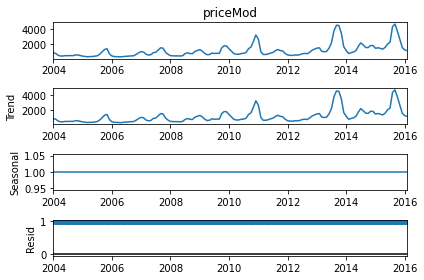

In [27]:
# Decompose the data frame to get the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_mum['priceMod'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

Modal price of onion for each month for the Mumbai market

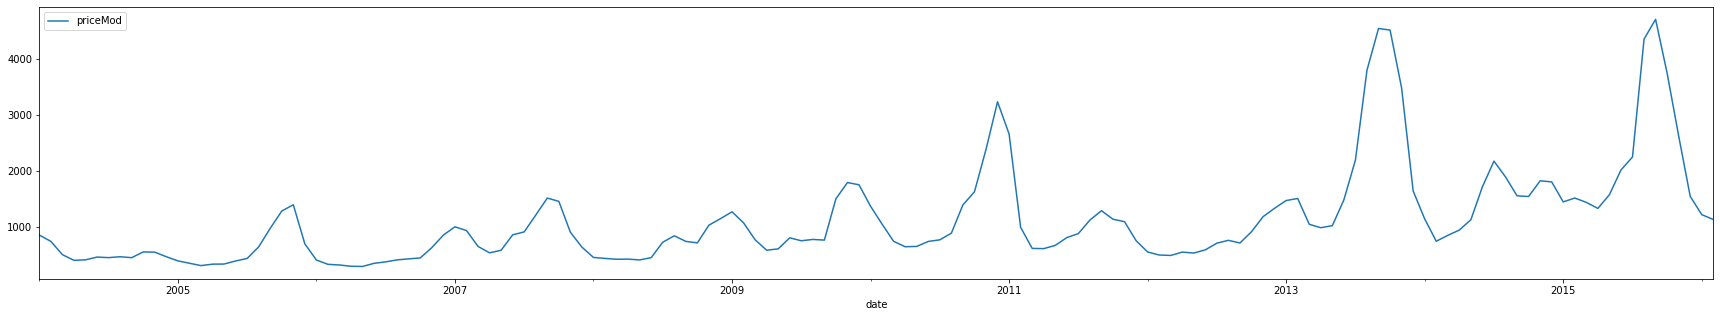

In [30]:
df_mum.plot(kind="line", y=["priceMod"],figsize=[30,5])
plt.show()

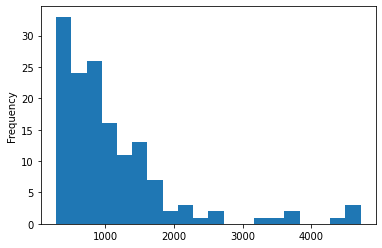

In [31]:
#Log-transformations can help to stabilize the variance of a time series

df_mum.priceMod.plot(kind="hist", bins=20)

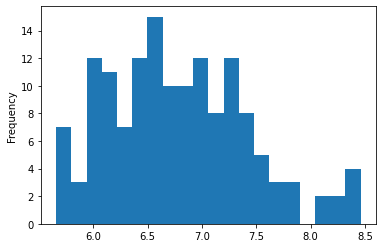

In [32]:
df_mum["log_priceMod"] = np.log(df_mum.priceMod)
df_mum.log_priceMod.plot(kind="hist", bins=20)

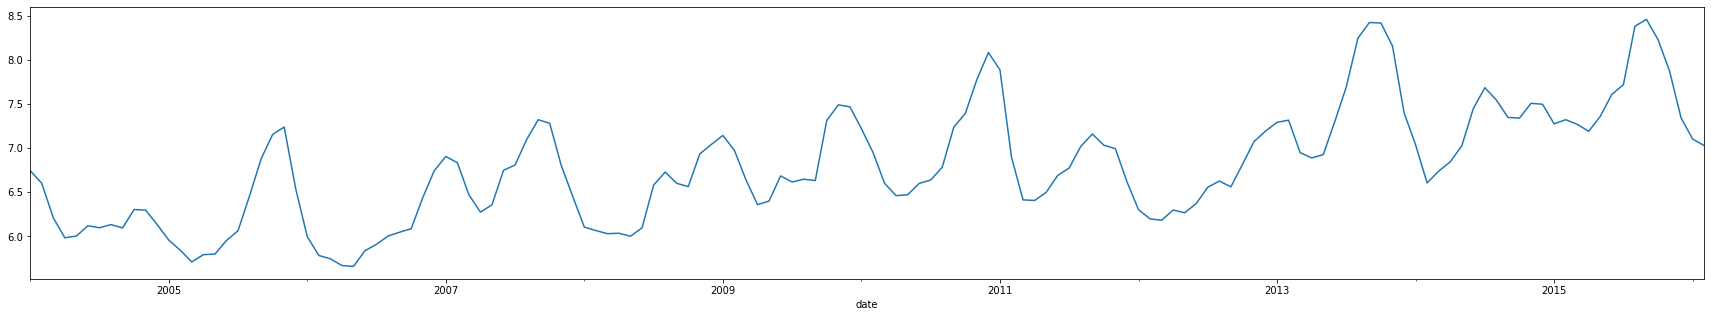

In [33]:
df_mum.log_priceMod.plot(figsize=[30,5])

 Building a time series model


In [34]:
df_mum.head()

,priceMod,log_priceMod
date,,
2004-01-01,849,7
2004-02-01,736,7
2004-03-01,498,6
2004-04-01,397,6
2004-05-01,405,6


In [35]:
x=df_mum.index.copy()

In [36]:
df_mum.date = x

<ipython-input-36-ba14c927d355>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_mum.date = x


In [37]:
df_mum.head()

,priceMod,log_priceMod
date,,
2004-01-01,849,7
2004-02-01,736,7
2004-03-01,498,6
2004-04-01,397,6
2004-05-01,405,6


In [38]:
# Converting the date into datetinme delta starting from 0
df_mum["timeindex"] = df_mum.date - df_mum.date.min()
df_mum.head()

,priceMod,log_priceMod,timeindex
date,,,
2004-01-01,849,7,0 days
2004-02-01,736,7,31 days
2004-03-01,498,6,60 days
2004-04-01,397,6,91 days
2004-05-01,405,6,121 days


In [39]:
df_mum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2004-01-01 to 2016-02-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   priceMod      146 non-null    int64          
 1   log_priceMod  146 non-null    float64        
 2   timeindex     146 non-null    timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 4.6 KB


In [40]:
# converting the timeindex into months using timedelta & then rounding it 
df_mum["timeindex"] = df_mum["timeindex"]/np.timedelta64(1,"D")
df_mum.head()

,priceMod,log_priceMod,timeindex
date,,,
2004-01-01,849,7,0
2004-02-01,736,7,31
2004-03-01,498,6,60
2004-04-01,397,6,91
2004-05-01,405,6,121


In [41]:
df_mum["timeindex"] = df_mum["timeindex"].round(0).astype(int)
df_mum

,priceMod,log_priceMod,timeindex
date,,,
2004-01-01,849,7,0
2004-02-01,736,7,31
2004-03-01,498,6,60
2004-04-01,397,6,91
2004-05-01,405,6,121
...,...,...,...
2015-10-01,3748,8,4291
2015-11-01,2623,8,4322
2015-12-01,1542,7,4352


In [42]:
import statsmodels.formula.api as smf
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_mum).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     129.3
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           8.75e-22
Time:                        15:10:53   Log-Likelihood:                -96.105
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.077     77.799      0.000       5.875       6.182
timeindex      0.0003   3.04e-05     11.372      0.000       0.000       0.000
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.052
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.792   Cond. No.                     5.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.0283932 , 6.03909673, 6.04910972, 6.05981325, 6.07017151,
       6.08087504, 6.0912333 , 6.10193683, 6.11264037, 6.12299863,
       6.13370216, 6.14406042, 6.15476395, 6.16546748, 6.17513519,
       6.18583873, 6.19619698, 6.20690052, 6.21725878, 6.22796231,
       6.23866584, 6.2490241 , 6.25972763, 6.27008589, 6.28078943,
       6.29149296, 6.30116067, 6.3118642 , 6.32222246, 6.33292599,
       6.34328425, 6.35398778, 6.36469132, 6.37504958, 6.38575311,
       6.39611137, 6.4068149 , 6.41751843, 6.42718614, 6.43788968,
       6.44824793, 6.45895147, 6.46930973, 6.48001326, 6.49071679,
       6.50107505, 6.51177858, 6.52213684, 6.53284038, 6.54354391,
       6.55355689, 6.56426043, 6.57461868, 6.58532222, 6.59568048,
       6.60638401, 6.61708754, 6.6274458 , 6.63814933, 6.64850759,
       6.65921113, 6.66991466, 6.67958237, 6.6902859 , 6.70064416,
       6.71134769, 6.72170595, 6.73240948, 6.74311302, 6.75347128,
       6.76417481, 6.77453307, 6.7852366 , 6.79594013, 6.80560

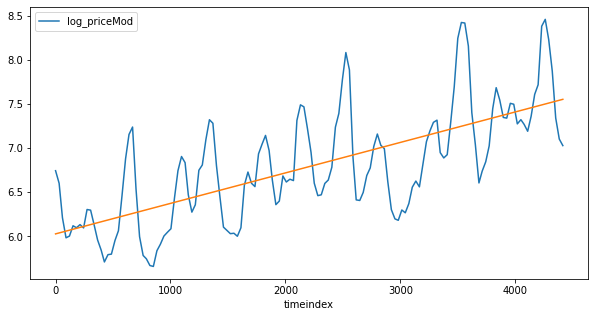

In [45]:
df_mum.plot(kind = "line", x="timeindex", y="log_priceMod", figsize=[10,5])
plt.plot(df_mum.timeindex, linear_model_pred)

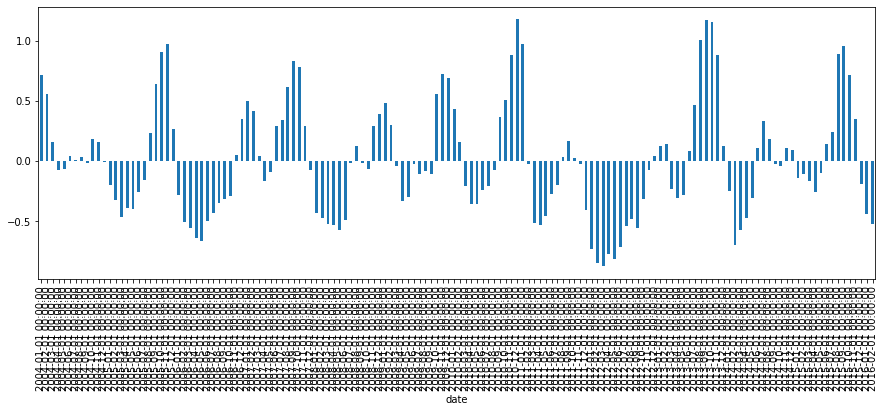

In [46]:
linear_model.resid.plot(kind="bar", figsize=[15,5])

Evaluate the model using RMSE

In [47]:
df_mum["linear_price"] = np.exp(linear_model_pred)
df_mum.head()

,priceMod,log_priceMod,timeindex,linear_price
date,,,,
2004-01-01,849,7,0,415
2004-02-01,736,7,31,420
2004-03-01,498,6,60,424
2004-04-01,397,6,91,428
2004-05-01,405,6,121,433


In [49]:
df_mum_dummy=df_mum.set_index('timeindex')
df_mum_dummy.head()

,priceMod,log_priceMod,linear_price
timeindex,,,
0,849,7,415
31,736,7,420
60,498,6,424
91,397,6,428
121,405,6,433


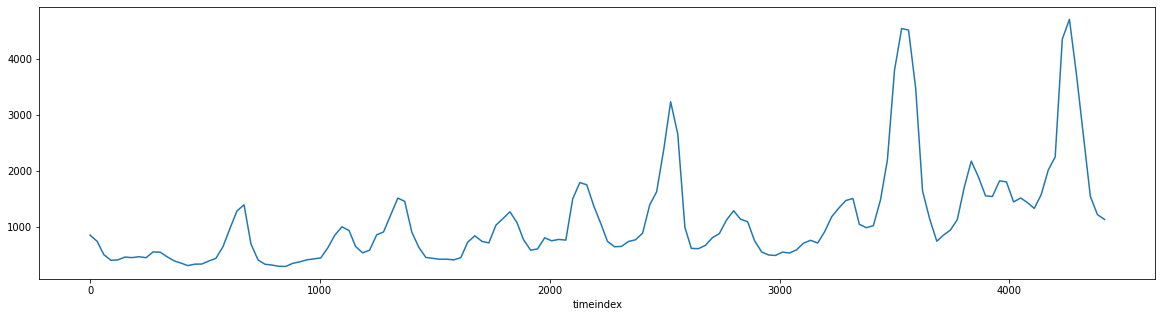

In [50]:
df_mum_dummy.priceMod.plot(figsize=[20,5])

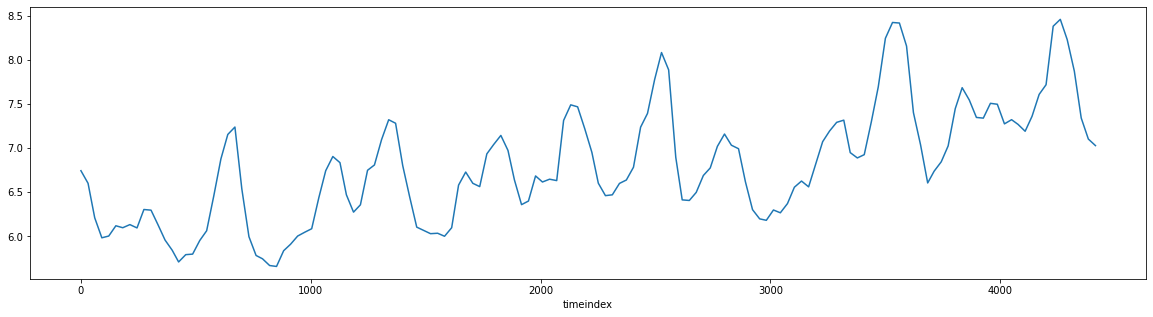

In [51]:
df_mum_dummy.log_priceMod.plot(figsize=[20,5])

In [52]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [54]:
linear_model_RMSE = RMSE(df_mum.priceMod, df_mum.linear_price)
linear_model_RMSE

724.6662938231534

Plotting ACF & PACF Plots

In [56]:
df_mum.head()

,priceMod,log_priceMod,timeindex,linear_price
date,,,,
2004-01-01,849,7,0,415
2004-02-01,736,7,31,420
2004-03-01,498,6,60,424
2004-04-01,397,6,91,428
2004-05-01,405,6,121,433


ACF & PACF for Modal_price

Adfuller test to check if the data is stationary, to perform AC


In [57]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

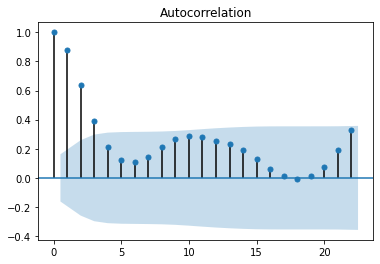

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_mum["priceMod"].dropna())

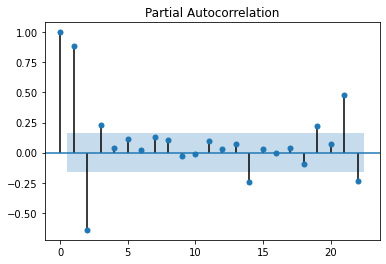

In [60]:
pacf = plot_pacf(df_mum["priceMod"].dropna())

ACF & PACF for log_modal_price

In [61]:
adf_test(df_mum['log_priceMod'])

ADF Statistics: -1.8316888567800318
p- value: 0.36484637626635197
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


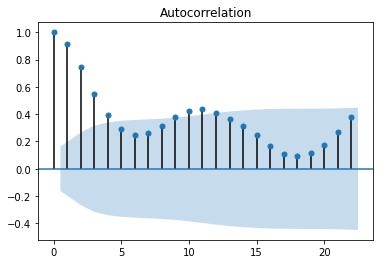

In [62]:
acf = plot_acf(df_mum["log_priceMod"].dropna())

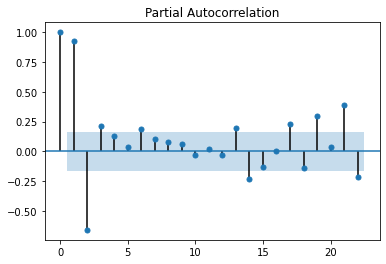

In [63]:
pacf = plot_pacf(df_mum["log_priceMod"].dropna())

performing exponential smoothing using Holt-Winter’s technique

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [65]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


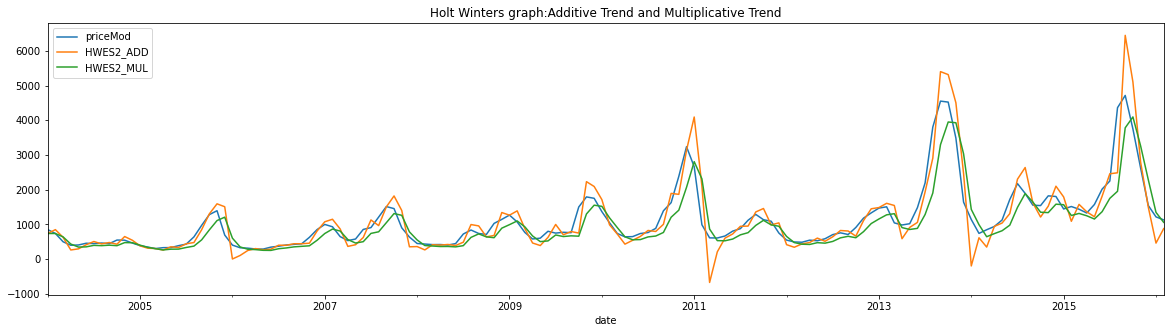

In [66]:
df_mum['HWES2_ADD'] = ExponentialSmoothing(df_mum['priceMod'],trend='add').fit().fittedvalues
df_mum['HWES2_MUL'] = ExponentialSmoothing(df_mum['priceMod'],trend='mul').fit().fittedvalues
df_mum[['priceMod','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph:Additive Trend and Multiplicative Trend',figsize=[20,5])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


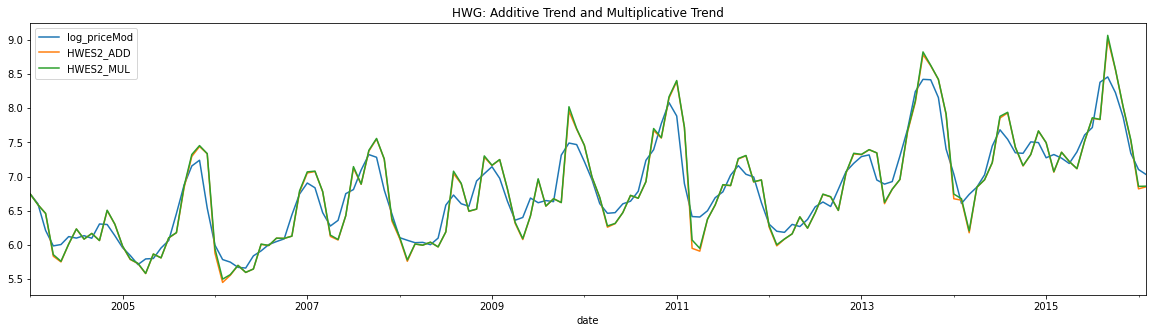

In [67]:
df_mum['HWES2_ADD'] = ExponentialSmoothing(df_mum['log_priceMod'],trend='add').fit().fittedvalues
df_mum['HWES2_MUL'] = ExponentialSmoothing(df_mum['log_priceMod'],trend='mul').fit().fittedvalues
df_mum[['log_priceMod','HWES2_ADD','HWES2_MUL']].plot(title='HWG: Additive Trend and Multiplicative Trend',figsize=[20,5])

Forecasting

In [68]:
df_mum.head(2)

,priceMod,log_priceMod,timeindex,linear_price,HWES2_ADD,HWES2_MUL
date,,,,,,
2004-01-01,849,7,0,415,7,7
2004-02-01,736,7,31,420,7,7


In [69]:
df_mum=df_mum.drop(['log_priceMod','timeindex','linear_price','HWES2_ADD','HWES2_MUL'],axis=1)

In [70]:
df_mum

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


In [72]:
# Split into train and test set
train_df_mum =df_mum[:-25]
test_df_mum = df_mum[-25:]

In [73]:
model = ExponentialSmoothing(train_df_mum, seasonal_periods=25, trend='add', seasonal='mul')
fitted = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [74]:
sales_forecast = fitted.forecast(steps=25)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


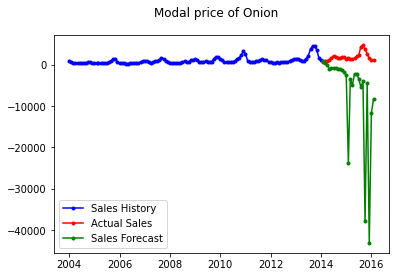

In [75]:
fig = plt.figure()
fig.suptitle('Modal price of Onion')
past, = plt.plot(train_df_mum.index, train_df_mum, 'b.-', label='Sales History')
future, = plt.plot(test_df_mum.index, test_df_mum, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(test_df_mum.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()